## Model Selection



## Import Packages

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn import mixture
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import itertools
import sklearn.datasets as datasets
from scipy import linalg
from sklearn import metrics
import matplotlib as mpl
from sklearn.model_selection import StratifiedKFold, KFold

In [38]:
colors  = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Part 1: synthetic data

### Generate some data

Make data from a mixture of gaussians using sklearn `make_blobs` method. Try experimenting with:
- The number of centers
- the `cluster_std`
- The total number of samples

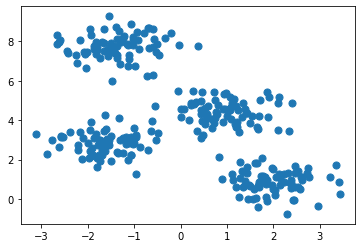

In [5]:
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.6, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [6]:
print(y_true.shape, X[:,0].shape)

(300,) (300,)


# Clustering - K-Means Example

Using the `KMeans` model, try and optimise, plot a graph of $K$ versus the `inertia_` value of the clustering. The `inertia_` value is the quantity that is minimised when K-means is training: the total sum of squared errors between the observations and the cluster centre to which they are assigned.

__Question__: what do you notice about this curve? Do you think you could use it to choose the correct number of clusters? See e.g. https://en.wikipedia.org/wiki/Elbow_method_(clustering). What happens when you vary the parameters used to generate the data (above)

__Question__ Choose K using the Elbow Method

__Question__: using the value of $K$ you have chosen, fit the clustering and then use the following code to plot the data coloured by cluster assignment. You can get the cluster assignment using the following code:
`y_kmeans = kmeans.predict(X)`

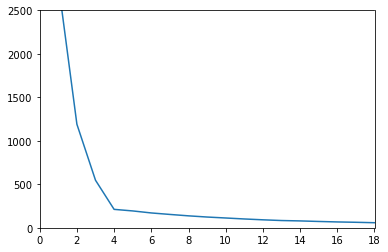

In [7]:
k_value = []
inertiaDict = {}
for i in range(1,30):
    kmeans = KMeans(n_clusters=i) 
    kmeans.fit(X)
    centers = kmeans.cluster_centers_
    #k_value.append(i)
    #print(i)
    inertiaDict[i] = (kmeans.inertia_)
plt.axis([0,18, 0, 2500])
plt.plot(inertiaDict.keys(), inertiaDict.values())

In [8]:
K = 4
kmeans = KMeans(n_clusters=K)
#kmeans.fit(X)
y_kmeans = kmeans.fit_predict(X)
silhouette_score(X, y_kmeans)

0.6819938690643478

In [9]:
#K = 4

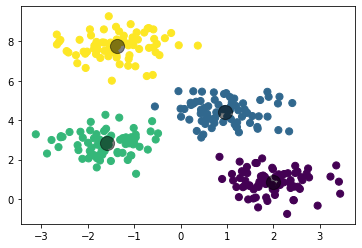

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

### Silhouette Score for K for K-Means

The silhouette score (https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html) is a method for optimising $K$ in a clustering setting. It computes how similar objects are to other objects within their cluster compared to how similar they are to points in neighbouring clusters.

__Question__: make a plot of Silhouette scores for the example data above. Vary the data generation parameters. Does the optimal $K$ from Silhouette agree with that from inspecting the inertia?

For n_clusters = 2 The average silhouette_score is : 0.5426422297358302
For n_clusters = 3 The average silhouette_score is : 0.5890390393551768
For n_clusters = 4 The average silhouette_score is : 0.6819938690643478
For n_clusters = 5 The average silhouette_score is : 0.5923875148758644
For n_clusters = 6 The average silhouette_score is : 0.49934504405927566


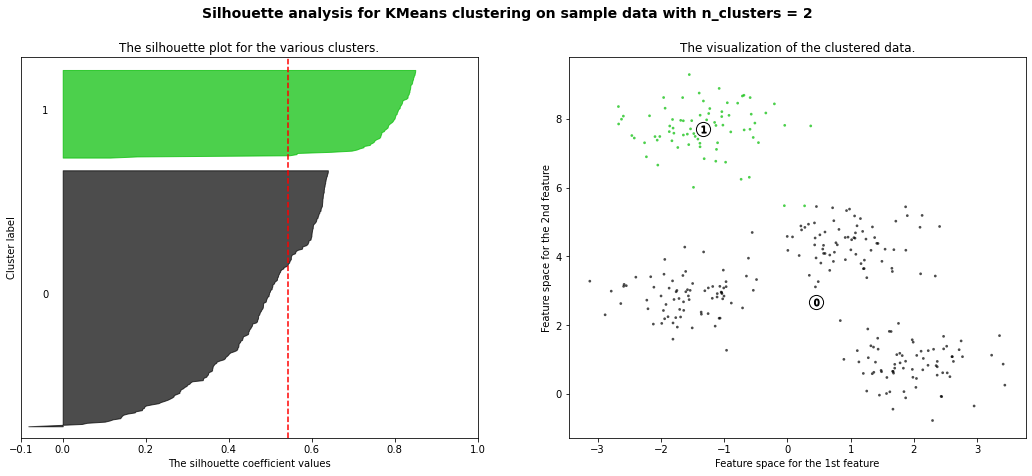

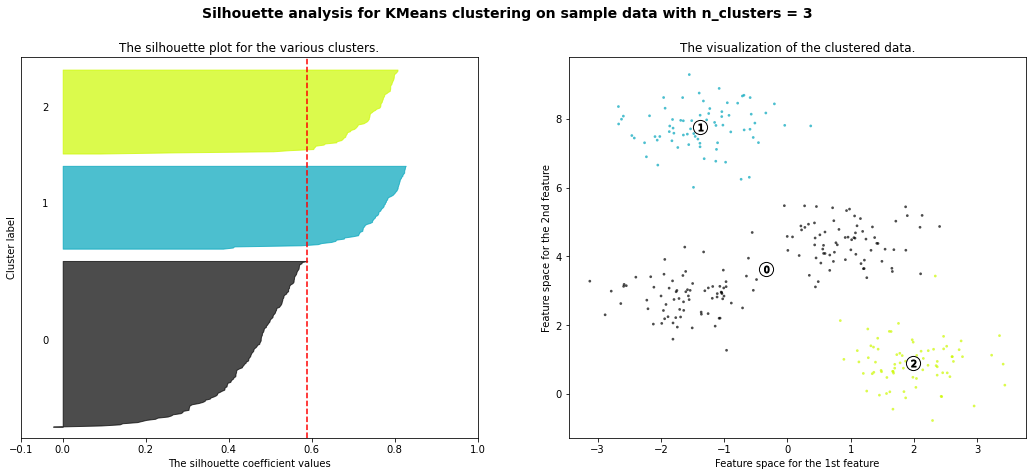

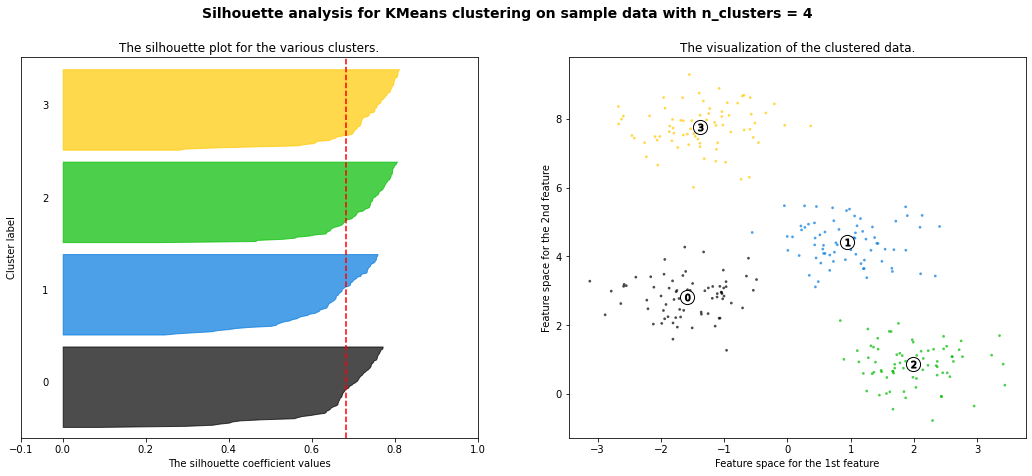

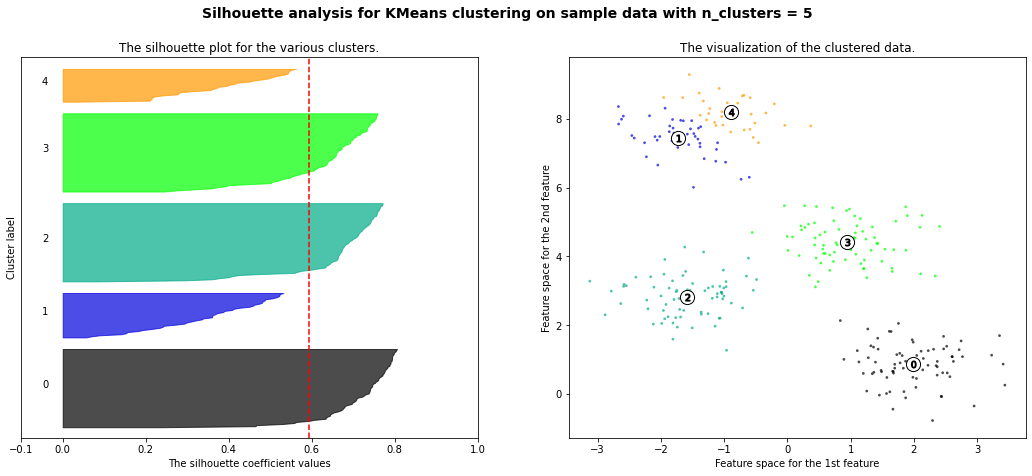

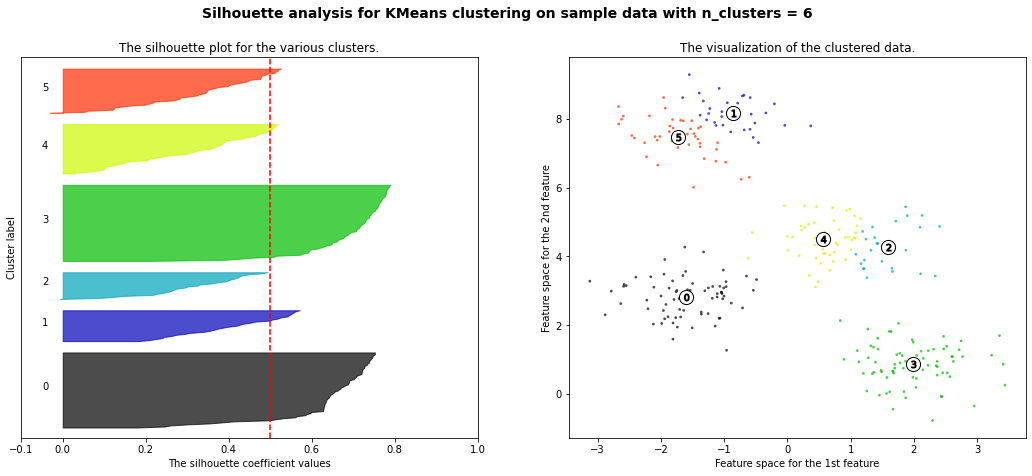

In [11]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

def check_silhouette(func = KMeans):
    range_n_clusters = [2, 3, 4, 5, 6]
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = func(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

    plt.show()
    
check_silhouette()

## BIC for K-means

Although K-means is not optimised by maximising the likelihood, you can compute a quanitity that is interpretable as BIC. To do this, compute:

$KD\ln(N) - E$

where $E$ is the negative of the `inertia_` property of K-means, and $D$ is the dimension of the data (in our case, 2).

__Question:__ for the data above, plot BIC for K-means as a function of $K$ for $K$ varying from 1 to 30. Does it agree with the previous answers?


4
Kmeans 12
226.45095077848902


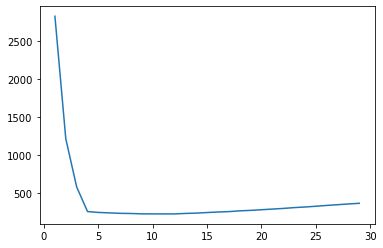

In [12]:
from math import log
#BIC
bic_score = []
bic_score2 = []
for K in range(1,30):
    kmeans = KMeans(n_clusters=K) 
    kmeans.fit(X)
    gmm = mixture.GaussianMixture(n_components = K,covariance_type='tied')
    gmm.fit(X)
    bic_score.append(gmm.bic(X))
    bic_score2.append(K*(2)*log(300) +kmeans.inertia_)
print(bic_score.index(min(bic_score))+1)
print("Kmeans",bic_score2.index(min(bic_score2))+1)
print(min(bic_score2))
plt.plot(np.arange(1,30), bic_score2)

# Mixture Models

Statistical mixture models are somewhat related to K-means but place the clustering problem within a statistical framework.

We will use Gaussian mixtures: models in which data from each cluster is assumed to come from a different Gaussian. With mixture models we have two model selection challenges: choosing $K$ and choosing the form of the Gaussian covariance matrices:

- spherical: the covariance matrices are of the form $\sigma^2\mathbf{I}$ (where $\mathbf{I}$ is an identity), i.e. the variance is the same in all dimensions and there is no correlation structure
- diagonal: there is no correlation structure, but the variance can be different in each dimension
- tied: all Gaussians share the same covariance matrix
- full: each Gaussian can have a different covariance matrix that can have full correlation structure

See https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_covariances.html

To create a Gaussian mixture object using sklearn with (say) a tied covariance structure, use:

```{python}
from sklearn import mixture
gmm = mixture.Gaussian(n_components = K,covariance_type='cv_type')
```

__Note__
- the `mixture.Gaussian` object has methods to compute BIC and AIC (`gmm.bic(X)` etc)
- you can also perform cross validation with a mixture, but computing the likelihood on held-out observations. The likelihood is the standard mixture likelihood:

$L = \prod_n \sum_k \pi_k p(x_n|k)$

where the product is over the held-out data, the sum is over the clusters, $\pi_k$ is the prior weight of cluster k (`gmm.weights_`) and $p(x_n|k)$ is the Gaussian likelihood of the nth observation in the kth cluster.

## Additional imports...

In [16]:
import numpy as np
import itertools
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
from sklearn import mixture

### Load a real data set

In [17]:
digits = load_digits()
data = scale(digits.data)
n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target
data.shape

(1797, 64)

### Useful code to plot a single digit

4

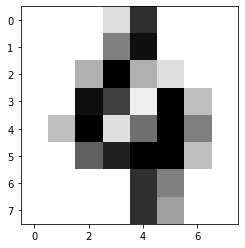

In [18]:
# method to plot a single digit
def plot_digit(digit_data):
    im = plt.imshow(digit_data.reshape(8,8), cmap='binary')
    im.set_clim(0, 16)

# example - plot the third one in the dataset    
plot_digit(digits.data[100])
labels[100]

### Project the data into 2D

In [19]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data)

([], [])

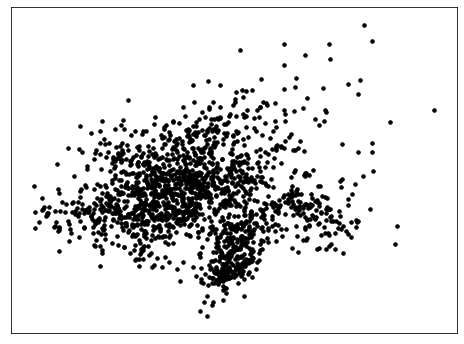

In [20]:
plt.figure(figsize=(8, 6))
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=7)
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

In [65]:
#plot_digit(reduced_data[2])

In [155]:
gmm = mixture.GaussianMixture(n_components = 10,covariance_type="full")
gmm.fit(X_train)
#print(gmm.bic(X_train))
print()
metrics.accuracy_score(labels,gmm.predict(reduced_data) )

0.05564830272676683

## The task

Explore different model selection strategies to determine the number of clusters required for a Gaussian mixture clustering of this data (in the 2D PCA space) **and** the correct choice of covariance matrix structure (from the options listed above).

You should try multiple methods (BIC, AIC, Silhouette, and cross-validation)

Explore the clusterings suggested by each method, and look to see which digits are being grouped or split (if the optimal number is not 10 (digits 0-9).

The following method might be useful to plot the result of the clustering(s) and nice covariance ellipses

In [39]:
from matplotlib.patches import Ellipse
#colors = ['navy', 'turquoise', 'darkorange','red'] # will need to add other colours here if more clusters
colors = ['navy', 'turquoise', 'darkorange','red', 'yellow', 'green', 'cyan', 'steelblue', 'purple', 'magenta']
def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect('equal', 'datalim')

In [40]:
#Determine K
from sklearn import mixture

# Break up the dataset into non-overlapping training (75%) and testing
# (25%) sets.
skf = StratifiedKFold(n_splits=7, random_state=0, shuffle=True)
# Only take the first fold.
train_index, test_index = next(iter(skf.split(reduced_data, labels)))

X_train = reduced_data[train_index]
y_train = labels[train_index]
X_test = reduced_data[test_index]
y_test = labels[test_index]
n_classes_list = []
cov_types= ['spherical', 'tied', 'full', 'diag']
cov_comp_dict= {}
comp_list = []
covariance_dict = {}


In [957]:
# 1. BIC
for i in range(1):
    bic_score = {}
    aic_score = {}
    n_classes_list = []
    for cov_type in cov_types:
        for K in range(1,12):
            gmm = mixture.GaussianMixture(n_components = K,covariance_type=cov_type)
            gmm.fit(reduced_data, labels)
            bic_score[K] = (gmm.bic(reduced_data))
            if (cov_type == "spherical" and K==2):
                print(gmm.covariances_)
#                covariance_dict[""]
        n_classes = list(bic_score.values()).index(min(list(bic_score.values())))+1
        n_classes_list.append(n_classes)
    comp_list.append(n_classes_list)

[3.96165647 6.933983  ]


In [732]:
plot_data = np.array(comp_list)
plot_data.shape

(100, 4)

In [937]:
results_bic = []
for x in range(4):
#     print(plot_data[:, x])
    results_bic.append(max(set(plot_data[:,x]), key=list(plot_data[:, x]).count))
    print("Best of " + str(cov_types[x]) +" is ", max(set(plot_data[:,x]), key=list(plot_data[:, x]).count))

Best of spherical is  10
Best of tied is  9
Best of full is  4
Best of diag is  5


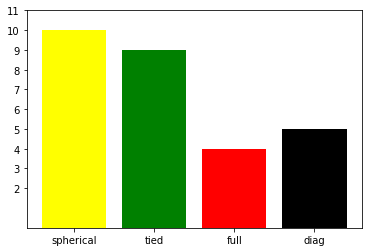

In [938]:
plt.bar(cov_types, results_bic, color = ['yellow', 'green', 'red', 'black'])
plt.yticks(range(2,12))
plt.show()
#max(set(n_classes_list), key=n_classes_list.count)

In [634]:
#2 AIC
comp_list_aic = []
for i in range(100):
    aic_score = {}
    n_classes_list = []
    for cov_type in cov_types:
        for K in range(1,12):
            gmm = mixture.GaussianMixture(n_components = K,covariance_type=cov_type)
            gmm.fit(reduced_data, labels)
            aic_score[K] = (gmm.aic(reduced_data))
        n_classes = list(aic_score.values()).index(min(list(aic_score.values())))+1
        n_classes_list.append(n_classes)
    comp_list_aic.append(n_classes_list)

In [636]:
plot_data_aic = np.array(comp_list_aic)

In [942]:
cov_types = ['spherical', 'tied', 'full', 'diag']
aic_results = []
print("Suggested by AIC:")
for x in range(4):
    aic_results.append(max(set(plot_data_aic[:,x]), key=list(plot_data_aic[:, x]).count))
    print("Best of " + str(cov_types[x]) +" is ", max(set(plot_data_aic[:,x]), key=list(plot_data_aic[:, x]).count))
    #print(cov_types[x], max(set(plot_data_aic[:,x]), key=list(plot_data_aic[:, x]).count))

Suggested by AIC:
Best of spherical is  11
Best of tied is  11
Best of full is  10
Best of diag is  11


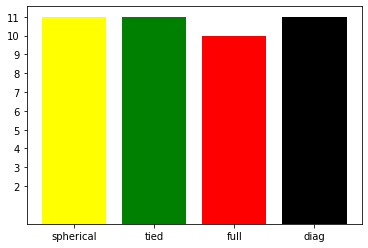

In [940]:
plt.bar(cov_types, aic_results, color = ['yellow', 'green', 'red', 'black'])
plt.yticks(range(2,12))
plt.show()

In [621]:
# 3- Silhouette Score

total_vote_BICount = []
total_vote_AICount = []
total_vote_SIL = []
for i in range(100):
    gm_bic_s = []
    gm_bic_t = []
    gm_bic_d = []
    gm_bic_f = []
    
    gm_aic_s = []
    gm_aic_t = []
    gm_aic_d = []
    gm_aic_f = []
    
    gm_sil_s = []
    gm_sil_t = []
    gm_sil_d = []
    gm_sil_f = []
    
    for i in range(2,12):
        gms = GaussianMixture(n_components=i, covariance_type='spherical').fit(reduced_data, labels)
        gmt = GaussianMixture(n_components=i, covariance_type='tied').fit(reduced_data, labels)
        gmd = GaussianMixture(n_components=i, covariance_type='diag').fit(reduced_data, labels)
        gmf = GaussianMixture(n_components=i, covariance_type='full').fit(reduced_data, labels)
        #print("BIC for number of cluster(s) {}: {}".format(i,gm.aic(data)))
        #print("Log-likelihood score for number of cluster(s) {}: {}".format(i,gm.score(data)))
        #print("-"*100)
        data_new = gmm.sample(100)
        labels_s = gms.predict(reduced_data)
        labels_t = gmt.predict(reduced_data)
        labels_d = gmd.predict(reduced_data)
        labels_f = gmf.predict(reduced_data)
        
        
        gm_sil_s.append(silhouette_score(reduced_data, labels_s))
        gm_sil_t.append(silhouette_score(reduced_data, labels_t))
        gm_sil_d.append(silhouette_score(reduced_data, labels_d))
        gm_sil_f.append(silhouette_score(reduced_data, labels_f))
        
        gm_bic_s.append(gms.bic(reduced_data))
        gm_bic_t.append(gmt.bic(reduced_data))
        gm_bic_d.append(gmd.bic(reduced_data))
        gm_bic_f.append(gmf.bic(reduced_data))
        
        gm_aic_s.append(gms.aic(reduced_data))
        gm_aic_t.append(gmt.aic(reduced_data))
        gm_aic_d.append(gmd.aic(reduced_data))
        gm_aic_f.append(gmf.aic(reduced_data))
        
        #gm_score.append(gm.score(reduced_data))
        
    total_vote_BICount.append(gm_bic_s)
    total_vote_BICount.append(gm_bic_t)
    total_vote_BICount.append(gm_bic_d)
    total_vote_BICount.append(gm_bic_f)
    
    total_vote_AICount.append(gm_aic_s)
    total_vote_AICount.append(gm_aic_t)
    total_vote_AICount.append(gm_aic_d)
    total_vote_AICount.append(gm_aic_f)
    
    total_vote_SIL.append(gm_sil_s)
    total_vote_SIL.append(gm_sil_t)
    total_vote_SIL.append(gm_sil_d)
    total_vote_SIL.append(gm_sil_f)

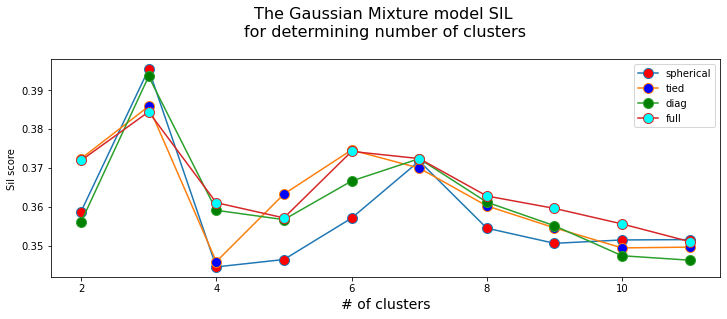

In [625]:

bic_s = total_vote_BICount[::4]
bic_t = total_vote_BICount[1::4]
bic_d = total_vote_BICount[2::4]
bic_f = total_vote_BICount[3::4]



aic_s = total_vote_AICount[::4]
aic_t = total_vote_AICount[1::4]
aic_d = total_vote_AICount[2::4]
aic_f = total_vote_AICount[3::4]



sil_s = total_vote_SIL[::4]
sil_t = total_vote_SIL[1::4]
sil_d = total_vote_SIL[2::4]
sil_f = total_vote_SIL[3::4]


bic_count_s = np.mean(bic_s, axis = 0)
bic_count_t = np.mean(bic_t, axis = 0)
bic_count_d = np.mean(bic_d, axis = 0)
bic_count_f = np.mean(bic_f, axis = 0)


aic_count_s = np.mean(aic_s, axis = 0)
aic_count_t = np.mean(aic_t, axis = 0)
aic_count_d = np.mean(aic_d, axis = 0)
aic_count_f = np.mean(aic_f, axis = 0)


sil_count_s = np.mean(sil_s, axis = 0)
sil_count_t = np.mean(sil_t, axis = 0)
sil_count_d = np.mean(sil_d, axis = 0)
sil_count_f = np.mean(sil_f, axis = 0)



plt.figure(figsize=(12,4))
plt.errorbar(range(2,12), sil_count_s, marker='o',label='spherical', markerfacecolor='red', markersize=10)
plt.errorbar(range(2,12), sil_count_t, marker='o',label='tied', markerfacecolor='blue', markersize=10)
plt.errorbar(range(2,12), sil_count_d, marker='o',label='diag', markerfacecolor='green', markersize=10)
plt.errorbar(range(2,12), sil_count_f, marker='o',label='full', markerfacecolor='cyan', markersize=10)


 

plt.title('The Gaussian Mixture model SIL \nfor determining number of clusters\n',fontsize=16)
plt.xlabel('# of clusters',fontsize=14)
plt.ylabel('Sil score')
plt.legend()

In [464]:
#3- Silhoutte Score - method -2
final_list = []
iter_final = []
iter_final2 = []
max_value_list = []
loop_var = 10
for f in range(loop_var):
    silhoutte_avg_dict = {}
    for cov_type in cov_types:
        for n_clusters in range(2,12):
            gmm = mixture.GaussianMixture(n_components = n_clusters,covariance_type=cov_type)
            cluster_labels = gmm.fit_predict(reduced_data, labels)
            # Samples 
            data_new = gmm.sample(100)
            cluster_labels = gmm.fit_predict(np.vstack((reduced_data,data_new[0])), np.hstack((labels,data_new[1])))
            silhouette_avg = silhouette_score(np.vstack((reduced_data,data_new[0])), cluster_labels)
            silhoutte_avg_dict[n_clusters] = silhouette_avg
        max_value = max(list(silhoutte_avg_dict.values()))
        final_n = list(silhoutte_avg_dict.keys())[list(silhoutte_avg_dict.values()).index(max_value)]
        max_value_list.append(max_value)
        final_list.append(final_n)
        iter_final2.append(silhoutte_avg_dict)
    iter_final.append({f:[final_list, max_value_list]})


In [943]:
#print([x for x in cov_types])

In [628]:
plot_data_sil = np.array(iter_final)
cov_types = ['spherical', 'tied', 'full', 'diag']
results_sil = []

x,y = np.array(plot_data_sil[0][0][0]).reshape(loop_var,4), np.array(plot_data_sil[0][0][1]).reshape(loop_var,4)
for c in range(0,4):
    results_sil.append()
    print(cov_types[c], max(set(x[:,c]), key=list(x[:, c]).count), np.mean(y, axis=0)[c])


spherical 3 0.39541031805394233
tied 3 0.38628991165295623
full 3 0.3855010445997303
diag 3 0.3926741583328779


In [912]:
'''
𝐿=∏𝑛∑𝑘𝜋𝑘𝑝(𝑥𝑛|𝑘) 
where the product is over the held-out data, the sum is over the clusters, 
𝜋𝑘  is the prior weight of cluster k (gmm.weights_) and 
𝑝(𝑥𝑛|𝑘)  is the Gaussian likelihood of the nth observation in the kth cluster.
'''

cv = StratifiedKFold(n_splits=7, random_state=0, shuffle=True)
metrics_final = {}
metrics_array = []
metrics_cov = []
from sklearn import metrics
likelihood_cluster = []

for cov_type in ['full', 'spherical', 'diag', 'tied']:
    metrics_intermediate = []
    for i in range(2,12):
        metrics_array = []
        for train_index, test_index in cv.split(X_train, y_train):
            X_train_cv, X_test_cv = X_train[train_index], X_train[test_index] # select X for training and testing
            y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]
            gmm = mixture.GaussianMixture(n_components = i,covariance_type=cov_type, n_init=3, random_state=0)
            gmm.fit(X_train_cv)
            likelihood = np.sum(gmm.score_samples(X_test_cv))
            metrics_array.append(likelihood)
        metrics_intermediate.append(np.mean(metrics_array))
    metrics_final[cov_type] = metrics_intermediate

In [944]:
#metrics_final

In [906]:
#HyperParameter testing using Randomized Grid Search CV.

In [945]:
dummy_list = []
for m in cov_types:
    print(m)
    dummy_list.append(max(metrics_final[m]))
    #print(m,metrics_final[m].index(max(metrics_final[m]))+2)

spherical
tied
full
diag


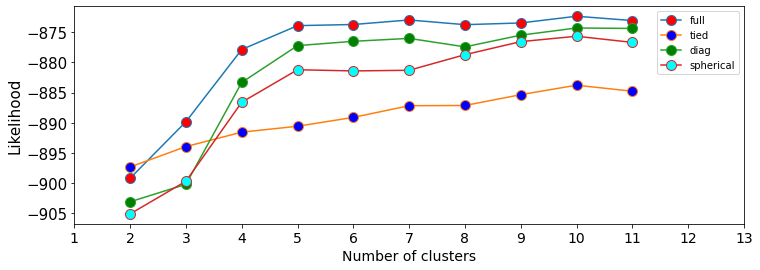

In [946]:
# fig, ax = plt.subplots(1,1,figsize=(15,5))
#spl = plt.subplot(2, 1, 1)
width = 0.15


plt.figure(figsize=(12,4))
plt.errorbar(range(2,12), [((x)) for x in metrics_final['full']], marker='o',label='full', markerfacecolor='red', markersize=10)
plt.errorbar(range(2,12), [((x)) for x in metrics_final['tied']], marker='o',label='tied', markerfacecolor='blue', markersize=10)
plt.errorbar(range(2,12), [((x)) for x in metrics_final['diag']], marker='o',label='diag', markerfacecolor='green', markersize=10)
plt.errorbar(range(2,12), [((x)) for x in metrics_final['spherical']], marker='o',label='spherical', markerfacecolor='cyan', markersize=10)



# ax.bar([i for i in range(2,12)],[((x)) for x in metrics_final['full']], width)
# ax.bar([i + width for i in range(2,12)],[((x)) for x in metrics_final['tied']], width)
# ax.bar([i + 2*width for i in range(2,12)],[((x)) for x in metrics_final['diag']], width)
# ax.bar([i + 3*width for i in range(2,12)],[((x)) for x in metrics_final['spherical']], width)
# ax.legend(['full', 'tied', 'diag', 'spherical'])

#plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Likelihood",fontsize=15)
plt.xticks([i for i in range(1,14)],fontsize=14)
plt.yticks(fontsize=15)
plt.legend()
plt.show()

In [34]:
#BIC = 10 spherical, AIC= 10 Full, Silhouette = 3, CV = spherical 10
def GaussianCovType(n_components = 10, covariance_type= "full"):
    digits = load_digits()
    data = scale(digits.data)
    gmm = mixture.GaussianMixture(n_components = n_components,covariance_type=covariance_type, n_init=5, random_state=0)
    gmm.fit(reduced_data)
    #print(gmm.score_samples(reduced_data))
    predicted_test = gmm.predict(reduced_data)
    #print(gmm.predict_proba(reduced_data).shape, reduced_data.shape)
    group_list = []
    for p in range(reduced_data.shape[0]):
        group_list.append((labels[p], list(gmm.predict_proba(reduced_data)[p]).index(max(gmm.predict_proba(reduced_data)[p]))+1))
    grouped = []

    group_list_final= {}
    for i in range(len(group_list)):
        for j in range(1,11):
            if group_list[i][1] == j:
                if j in group_list_final.keys():
                    if not group_list[i][0] in group_list_final[j]:
                        group_list_final[j].append(group_list[i][0])
                else:
                    group_list_final[j] = [group_list[i][0]]
    return group_list_final





In [35]:
bic_clustering = GaussianCovType(n_components=10, covariance_type="spherical")

In [949]:
aic_clustering = GaussianCovType(n_components=10, covariance_type="full")

In [950]:
sil_clustering = GaussianCovType(n_components=3, covariance_type="spherical")

In [951]:
cv_clustering = GaussianCovType(n_components=10, covariance_type="full")

In [ ]:
#AIC : Full 10.
#BIC: Spherical 10.
#Sil: - 3.
#CV: spherical 10

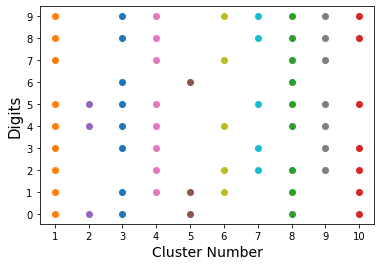

In [36]:
#BIC
fig = plt.figure()
ax = fig.add_subplot(111)
plt.xlabel("Cluster Number",fontsize=14)
plt.ylabel("Digits",fontsize=15)
plt.xticks(range(1,11))
plt.yticks(range(0,10))
for color, (x, ys) in zip(colors,bic_clustering.items()):
    ax.scatter([x] * len(ys), ys, color=color, linewidth=0, s=50)

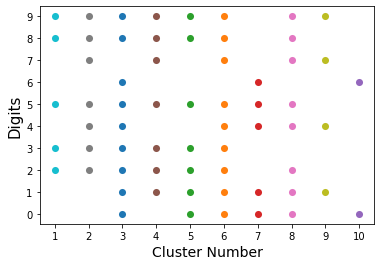

In [850]:
#AIC

fig = plt.figure()
ax = fig.add_subplot(111)
plt.xlabel("Cluster Number",fontsize=14)
plt.ylabel("Digits",fontsize=15)
plt.xticks(range(1,11))
plt.yticks(range(0,10))
colors  = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
for color, (x, ys) in zip(colors,aic_clustering.items()):
    ax.scatter([x] * len(ys), ys, color=color, linewidth=0, s=50)

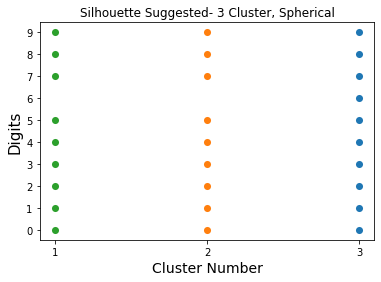

In [863]:
#Sil

fig = plt.figure()
ax = fig.add_subplot(111)
plt.xlabel("Cluster Number",fontsize=14)
plt.ylabel("Digits",fontsize=15)
plt.title("Silhouette Suggested- 3 Cluster, Spherical")
plt.xticks(range(1,11))
plt.yticks(range(0,10))
colors  = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
for color, (x, ys) in zip(colors,sil_clustering.items()):
    ax.scatter([x] * len(ys), ys, color=color, linewidth=0, s=50)

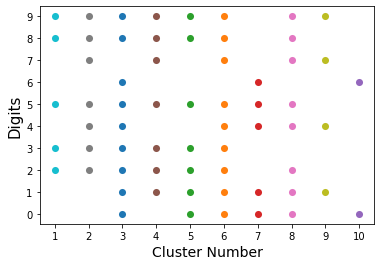

In [852]:
#Cross Validation

fig = plt.figure()
ax = fig.add_subplot(111)
plt.xlabel("Cluster Number",fontsize=14)
plt.ylabel("Digits",fontsize=15)
plt.xticks(range(1,11))
plt.yticks(range(0,10))
colors  = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
for color, (x, ys) in zip(colors,cv_clustering.items()):
    ax.scatter([x] * len(ys), ys, color=color, linewidth=0, s=50)

10
4


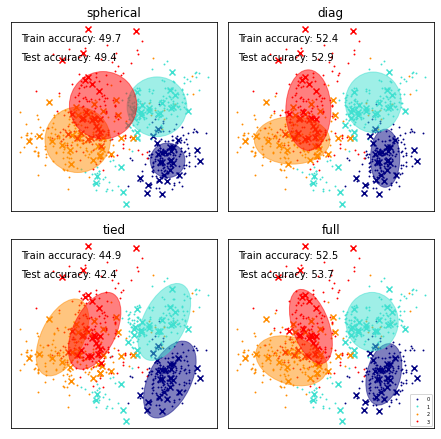

In [29]:
from sklearn import mixture
from sklearn.mixture import GaussianMixture

n_classes = len(np.unique(y_train))
print(n_classes)

# Try GMMs using different types of covariances.
estimators = {cov_type: GaussianMixture(n_components=10,
              covariance_type=cov_type, n_init = 2,random_state=0)
              for cov_type in ['spherical', 'diag', 'tied', 'full'] }

n_estimators = len(estimators)
print(n_estimators)
plt.figure(figsize=(3 * n_estimators // 2, 6))
plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05,
                    left=.01, right=.99)


for index, (name, estimator) in enumerate(estimators.items()):
    # Since we have class labels for the training data, we can
    # initialize the GMM parameters in a supervised manner.
    estimator.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                    for i in range(n_classes)])

    # Train the other parameters using the EM algorithm.
    estimator.fit(X_train)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)

    for n, color in enumerate(colors):
        data = reduced_data[labels == n]
        plt.scatter(data[:, 0], data[:, 1], s=0.8, color=color,
                    label=labels[n])
    # Plot the test data with crosses
    for n, color in enumerate(colors):
        data = X_test[y_test == n]
        plt.scatter(data[:, 0], data[:, 1], marker='x', color=color)

    y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    plt.text(0.05, 0.9, 'Train accuracy: %.1f' % train_accuracy,
             transform=h.transAxes)

    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    plt.text(0.05, 0.8, 'Test accuracy: %.1f' % test_accuracy,
             transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(scatterpoints=1, loc='lower right', prop=dict(size=5))


plt.show()


In [ ]:
# From the above we see that spherical gives max accuracy on test data

In [874]:
print(reduced_data.shape)
gmm.predict(reduced_data).shape

(1797, 2)


(1797,)

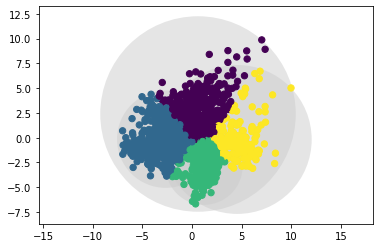

In [46]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))
        
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, reduced_data)

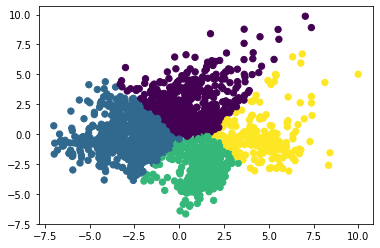

In [48]:
from sklearn.cluster import KMeans
kmeans = KMeans(4, random_state=0)
labels = kmeans.fit(reduced_data).predict(reduced_data)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, s=40, cmap='viridis');

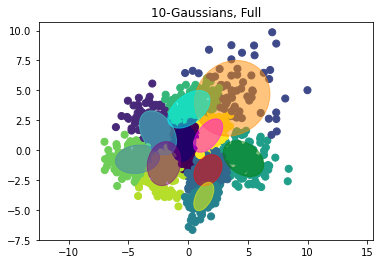

In [41]:
# Example usage
gmm = mixture.GaussianMixture(n_components =10,covariance_type='full')
gmm.fit(reduced_data)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=gmm.predict(reduced_data), s=50, cmap='viridis')
plt.title("10-Gaussians, Full")
make_ellipses(gmm, plt.gca())

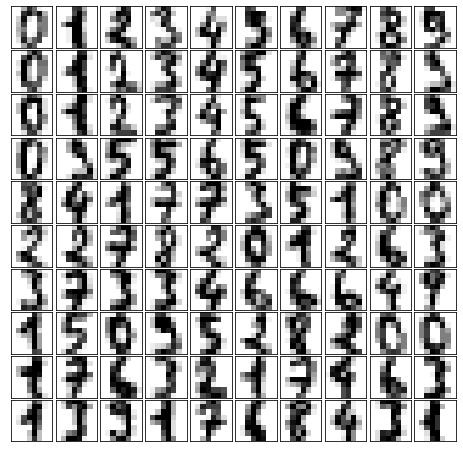

In [55]:
def plot_digits(data):
    fig, ax = plt.subplots(10, 10, figsize=(8, 8),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(8, 8), cmap='binary')
        im.set_clim(0, 16)
plot_digits(data[])

In [ ]:
pl